# <center>
# <center> **CSE473 Computational Intelligence**
## <center> **Team C18**
### <center> 19P6038 Ali Ahmed Ali Ahmed
### <center> 19P3128 Maha Mohamed Mohamed Roshdy Nabhan
### <center> 18P8958 Yomna Khalid Hussein Hassan Soltan

In [ ]:
import numpy as np
import tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.layers import Layer
from skimage import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# Combine train and test sets for normalization
all_data = np.concatenate((x_train, x_test), axis=0)

In [ ]:
# Calculate the mean and standard deviation
mean = np.mean(all_data)
std = np.std(all_data)

In [ ]:
# Normalize the data
all_data_normalized = (all_data - mean) / std

In [ ]:
# Split the normalized data into train, validation, and test sets
total_samples = all_data_normalized.shape[0]
train_samples = int(0.7 * total_samples)
val_samples = int(0.15 * total_samples)

x_train = all_data_normalized[:train_samples]
x_val = all_data_normalized[train_samples:train_samples + val_samples]
x_test = all_data_normalized[train_samples + val_samples:]

print(len(x_train))
print(len(x_val))
print(len(x_test))

49000
10500
10500


In [ ]:
# Also split the labels accordingly
all_labels = np.concatenate((y_train, y_test), axis=0)
y_train = all_labels[:train_samples]
y_val = all_labels[train_samples:train_samples + val_samples]
y_test = all_labels[train_samples + val_samples:]

In [ ]:
# Flatten the images
x_train = x_train.reshape((len(x_train), -1))
x_val = x_val.reshape((len(x_val), -1))
x_test = x_test.reshape((len(x_test), -1))

In [ ]:
list_xtest = [ [x_test[i], y_test[i]] for i in y_test]
print(len(list_xtest))

10500


In [ ]:
# Pick 5 random indices
np.random.seed(0)  # Set a random seed for reproducibility
random_indices = np.random.choice(all_data.shape[0], 5, replace=False)

# Visualization function for specific data samples
def visualize_data_samples(data, indices, labels, title):
    plt.figure(figsize=(10, 2))
    for i, idx in enumerate(indices):
        plt.subplot(1, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(data[idx].reshape(28, 28), cmap=plt.cm.gray)
        plt.xlabel(labels[idx])
    plt.suptitle(title)
    plt.show()

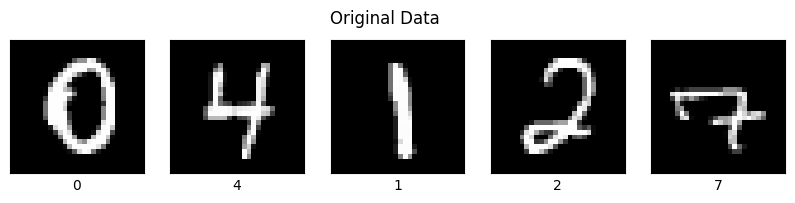

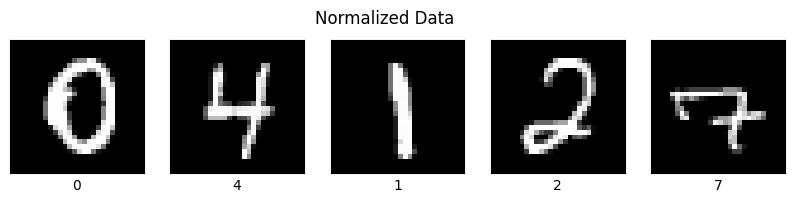

In [ ]:
# Visualize specific data samples before normalization
visualize_data_samples(all_data, random_indices, all_labels, 'Original Data')

# Visualize specific data samples after normalization
visualize_data_samples(all_data_normalized, random_indices, all_labels, 'Normalized Data')

In [ ]:
encoder_input = Input(shape=(784,))
encoded = Dense(64, activation='relu')(encoder_input)
encoder = Model(encoder_input, encoded)

In [ ]:
# Create the decoder
decoder_input = Input(shape=(64,))
decoded = Dense(784, activation='relu')(decoder_input)
decoder = Model(decoder_input, decoded)

In [ ]:
# Create the autoencoder
autoencoder = Model(encoder_input, decoder(encoder(encoder_input)))

In [ ]:
lr_schedule = tensorflow.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate = 5e-01, decay_steps = 2500, decay_rate = 0.75,staircase=True)
tensorflow.keras.optimizers.Adam(learning_rate = lr_schedule,beta_1=0.95,beta_2=0.99,epsilon=1e-01)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the autoencoder
history = autoencoder.fit(x_train, x_train,
                epochs=25,
                batch_size=512,
                shuffle=True,
                validation_data=(x_val, x_val))

Epoch 1/25
96/96 [==============================] - 5s 11ms/step - loss: 0.6170 - val_loss: 0.3960
Epoch 2/25
96/96 [==============================] - 1s 7ms/step - loss: 0.3388 - val_loss: 0.3046
Epoch 3/25
96/96 [==============================] - 0s 5ms/step - loss: 0.2913 - val_loss: 0.2808
Epoch 4/25
96/96 [==============================] - 0s 5ms/step - loss: 0.2750 - val_loss: 0.2691
Epoch 5/25
96/96 [==============================] - 0s 5ms/step - loss: 0.2659 - val_loss: 0.2626
Epoch 6/25
96/96 [==============================] - 0s 4ms/step - loss: 0.2602 - val_loss: 0.2574
Epoch 7/25
96/96 [==============================] - 0s 5ms/step - loss: 0.2556 - val_loss: 0.2533
Epoch 8/25
96/96 [==============================] - 0s 5ms/step - loss: 0.2519 - val_loss: 0.2498
Epoch 9/25
96/96 [==============================] - 0s 5ms/step - loss: 0.2489 - val_loss: 0.2473
Epoch 10/25
96/96 [==============================] - 0s 5ms/step - loss: 0.2467 - val_loss: 0.2455
Epoch 11/25
96/96 

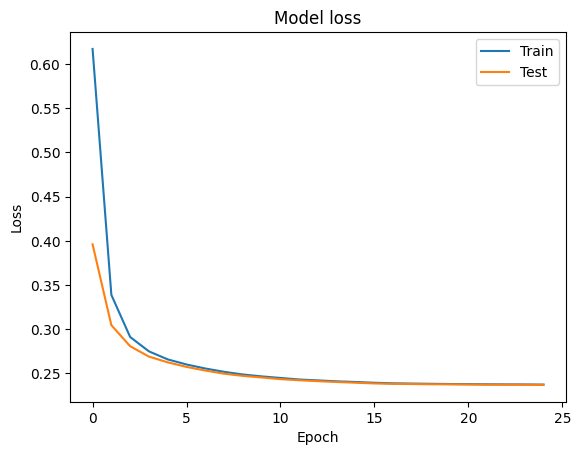

In [ ]:
# Plot the training history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
# Plot the test figures vs. predicted figures
decoded_imgs = autoencoder.predict(x_test)

329/329 [==============================] - 1s 2ms/step


In [ ]:
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0])
    return err

In [ ]:
def ssim(imageA, imageB):
    return metrics.structural_similarity(imageA, imageB,channel_axis=None)

[3, 4, 5, 6, 7, 8, 9, 5, 6, 6]
mse and ssim for image 0 are 3.4501213887018857e-06 and 0.9941407308020751
mse and ssim for image 1 are 3.147125842864094e-06 and 0.9944964903945481
mse and ssim for image 2 are 3.684656200340923e-06 and 0.9939388926200817
mse and ssim for image 3 are 4.332806375117932e-06 and 0.9936458794040974
mse and ssim for image 4 are 3.4075802987755295e-06 and 0.9938557079794474
mse and ssim for image 5 are 3.2452380712824317e-06 and 0.994180320467618
mse and ssim for image 6 are 3.195899137172049e-06 and 0.9942122405935989
mse and ssim for image 7 are 3.3454827222972554e-06 and 0.994131443356487
mse and ssim for image 8 are 3.283534296160309e-06 and 0.994293717231726
mse and ssim for image 9 are 2.9929691308576526e-06 and 0.9943383663203232


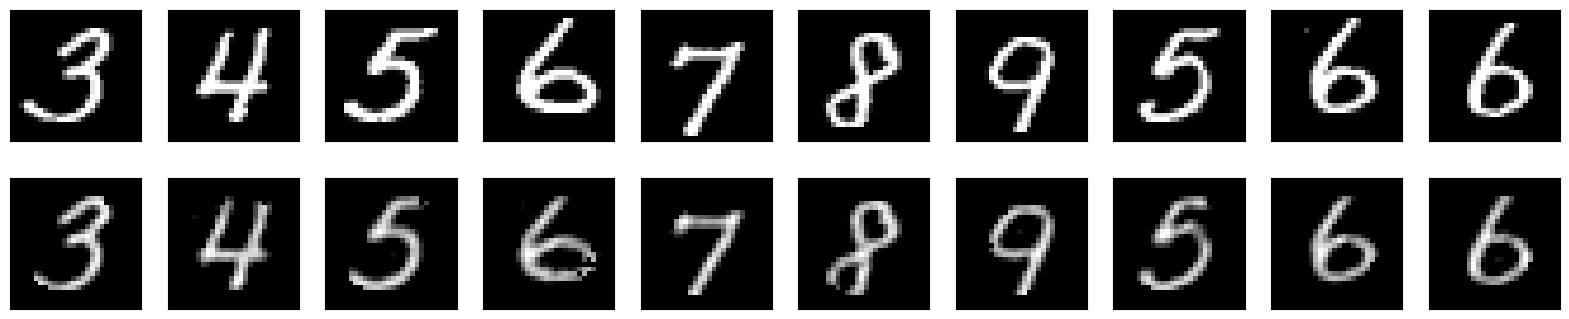

Decomser: [3, 4, 5, 6, 7, 8, 9, 5, 6, 6]
Decossimr: [3, 4, 5, 6, 7, 8, 9, 5, 6, 6]


In [ ]:
# Initialize lists for storing results
decomser = []
decossimr = []
n = 10

# Ensure that list_xtestn has the correct pairs of test images and labels
list_xtestn = [[x_test[i], y_test[i]] for i in range(n)]

# Display the labels for verification
print([list_xtestn[i][1] for i in range(n)])

# Set up the figure for displaying images
plt.figure(figsize=(20, 4))

# Loop through the first n images
for i in range(n):

    # Convert and normalize images
    original_image = list_xtestn[i][0].astype('float32') / 255
    reconstructed_image = decoded_imgs[i].astype('float32') / 255

    # Calculate MSE and SSIM for the current image
    msel = mse(original_image, reconstructed_image)
    ssiml = ssim(original_image, reconstructed_image)

    # Append to lists if conditions are met
    if msel <= 0.01:
        decomser.append(list_xtestn[i][1])
    if ssiml > 0.85:
        decossimr.append(list_xtestn[i][1])

    # Display original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(list_xtestn[i][0].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed image
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Print MSE and SSIM values for each image
    print(f"mse and ssim for image {i} are {msel} and {ssiml}")

# Show the figure with the images
plt.show()

# Print out the results
print("Decomser:", decomser)
print("Decossimr:", decossimr)